In [35]:
from preproc import PreProcessor
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

pp = PreProcessor()

pp.raw_train

[nltk_data] Downloading package stopwords to
[nltk_data]     /homes/ss5120/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,par_id,community,text,label
0,4341,poor-families,"The scheme saw an estimated 150,000 children f...",1
1,4136,homeless,Durban 's homeless communities reconciliation ...,1
2,10352,poor-families,The next immediate problem that cropped up was...,1
3,8279,vulnerable,Far more important than the implications for t...,1
4,1164,poor-families,To strengthen child-sensitive social protectio...,1
...,...,...,...,...
8370,8380,refugee,Rescue teams search for survivors on the rubbl...,0
8371,8381,hopeless,The launch of ' Happy Birthday ' took place la...,0
8372,8382,homeless,"The unrest has left at least 20,000 people dea...",0
8373,8383,hopeless,You have to see it from my perspective . I may...,0


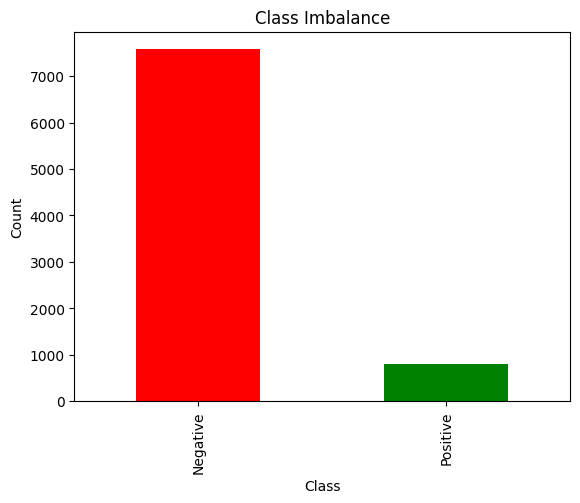

In [36]:
class_counts = pp.raw_train['label'].value_counts()
class_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Class Imbalance')
plt.show()

In [37]:
mean_word_length = (
    pp.raw_train["text"]
    .str.split()
    .apply(lambda x: [len(i) for i in x])
    .map(lambda x: sum(x) / len(x))
    .mean()
)
print("Mean Word Length: ")
mean_word_length

Mean Word Length: 


4.603440858871913

In [38]:
mean_sentence_length = (
    pp.raw_train["text"].apply(lambda x: len(x.split())).mean()
)
print("Mean Sentence Length: ")
mean_sentence_length

Mean Sentence Length: 


48.67331343283582

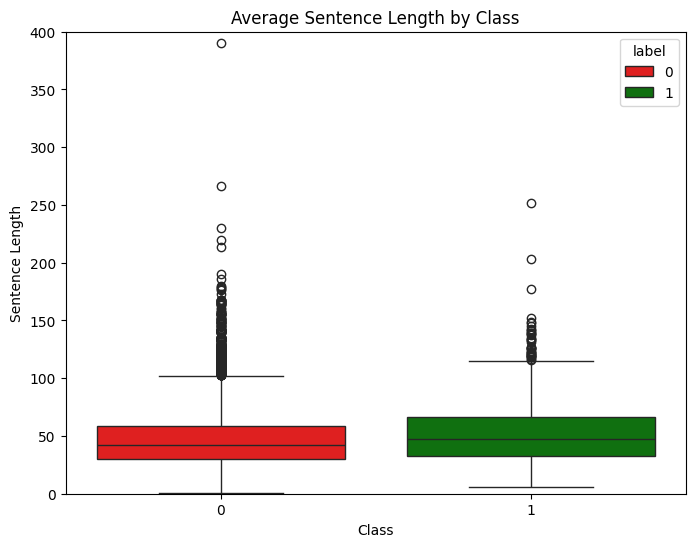

In [39]:
pp.raw_train["sentence_length"] = pp.raw_train["text"].apply(
    lambda x: len(x.split())
)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x="label",
    y="sentence_length",
    data=pp.raw_train,
    hue="label",
    palette={0: "red", 1: "green"},
    dodge=False,
)
plt.ylim(0, 400)  # Set the y-axis limits to exclude values over 400
plt.xlabel("Class")
plt.ylabel("Sentence Length")
plt.title("Average Sentence Length by Class")
plt.show()

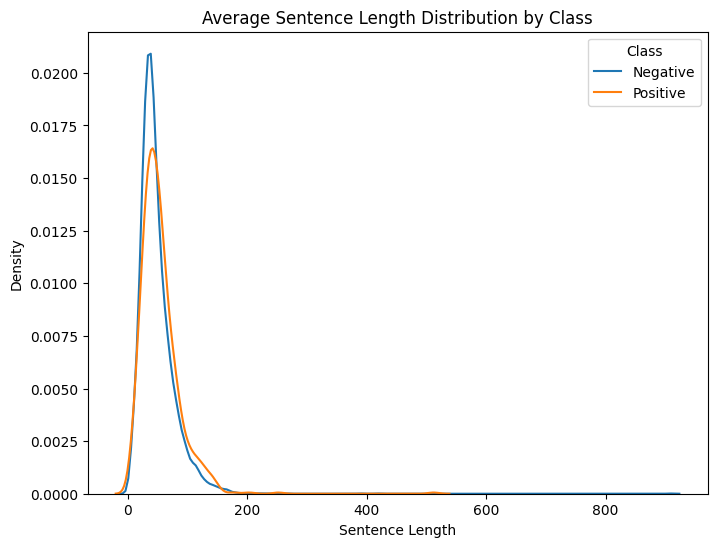

In [40]:
negative_sentences = pp.raw_train[pp.raw_train['label'] == 0]['sentence_length']
positive_sentences = pp.raw_train[pp.raw_train['label'] == 1]['sentence_length']

plt.figure(figsize=(8, 6))
sns.kdeplot(negative_sentences, label='Negative')
sns.kdeplot(positive_sentences, label='Positive')
plt.xlabel('Sentence Length')
plt.ylabel('Density')
plt.title('Average Sentence Length Distribution by Class')
plt.legend(title='Class')
plt.show()

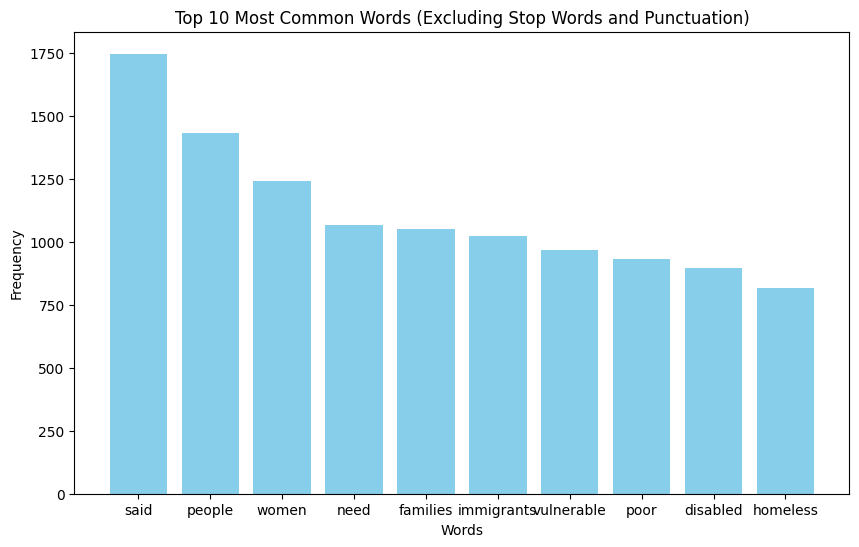

In [48]:
import string 
from collections import Counter
import pandas as pd

# Combine all text into a single string and remove punctuation
all_text = ' '.join(pp.raw_train['text'])
all_text = all_text.translate(str.maketrans('', '', string.punctuation))

# Tokenize the text and remove stop words
stop_words = set(stopwords.words('english'))
words = all_text.split()
filtered_words = [word for word in words if word.lower() not in stop_words]

# Count word occurrences
word_counts = Counter(filtered_words)

# Get the most common words and their counts
top_words = word_counts.most_common(10)
top_words, counts = zip(*top_words)

# Create a bar plot for the most common words
plt.figure(figsize=(10, 6))
plt.bar(top_words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words (Excluding Stop Words and Punctuation)')
plt.show()

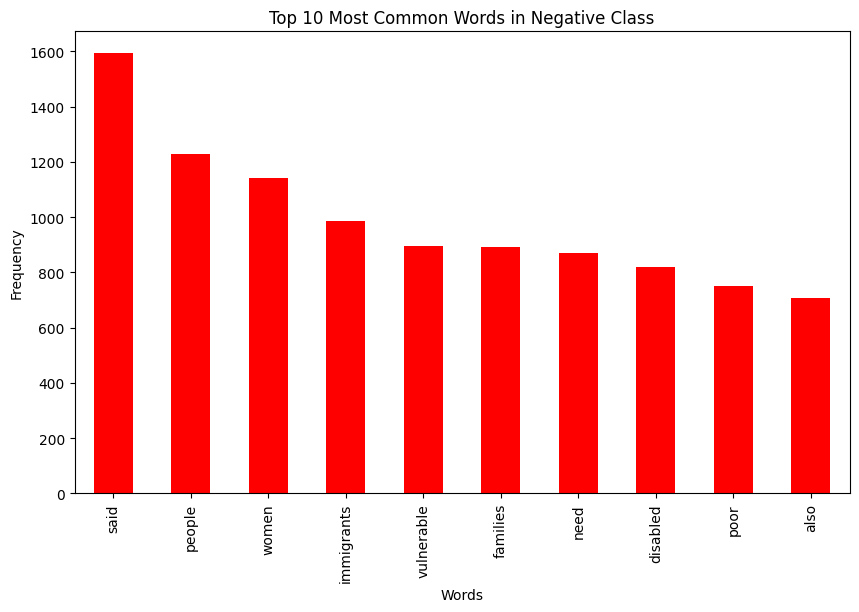

In [49]:
all_text = ' '.join(pp.raw_train[pp.raw_train['label'] == 0]['text'])
all_text = all_text.translate(str.maketrans('', '', string.punctuation))

# Tokenize the text and remove stop words
stop_words = set(stopwords.words('english'))
words = all_text.split()

# Create a DataFrame with the filtered words
word_df_negative = pd.DataFrame({'word': words})

# Remove stop words
word_df_negative = word_df_negative[~word_df_negative['word'].str.lower().isin(stop_words)]

# Count word occurrences
word_counts_negative = word_df_negative['word'].value_counts().nlargest(10)

# Create a bar plot for the most common words in the negative class
word_counts_negative.plot(kind='bar', color='red', figsize=(10, 6))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Negative Class')
plt.show()

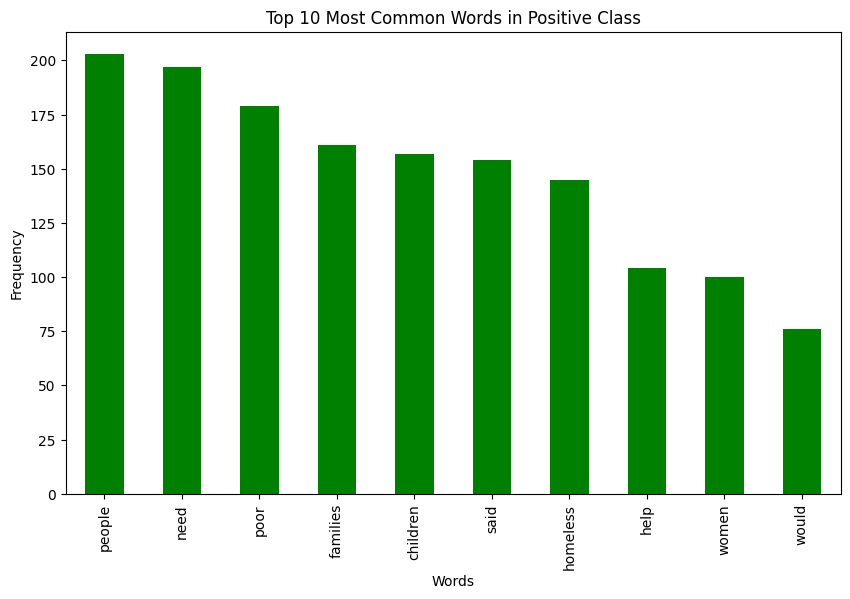

In [50]:
all_text = ' '.join(pp.raw_train[pp.raw_train['label'] == 1]['text'])
all_text = all_text.translate(str.maketrans('', '', string.punctuation))

# Tokenize the text and remove stop words
stop_words = set(stopwords.words('english'))
words = all_text.split()

# Create a DataFrame with the filtered words
word_df_positive = pd.DataFrame({'word': words})

# Remove stop words
word_df_positive = word_df_positive[~word_df_positive['word'].str.lower().isin(stop_words)]

# Count word occurrences
word_counts_positive = word_df_positive['word'].value_counts().nlargest(10)

# Create a bar plot for the most common words in the positive class
word_counts_positive.plot(kind='bar', color='green', figsize=(10, 6))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Positive Class')
plt.show()